<a href="https://colab.research.google.com/github/hucarlos08/GEO-ML/blob/main/Lessons/Likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maximum likelihood estimation

In probability and statistics, the likelihood function measures the plausibility of a parameter value, given a specific sample of data. The concept of likelihood is foundational to various statistical methods, including Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP) estimation.
. In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of a probability distribution by maximizing a likelihood function, so that under the assumed statistical model the observed data is most probable.

## The idea
The goal of maximum likelihood estimation is to make inferences about the population that is most likely to have generated the sample, specifically the joint probability distribution of the random variables ${\displaystyle \left\{\mathbf x_{1},\mathbf x_{2},\ldots \right\}}$, not necessarily independent and identically distributed. Associated with each probability distribution is a unique vector ${\displaystyle \theta =\left[\theta _{1},\,\theta _{2},\ldots \,,\theta _{k}\right]^{\mathsf {T}}}$ of parameters that index the probability distribution within a parametric family ${\displaystyle \{f(\cdot \,|\theta )\mid \theta \in \Theta \}}$, where $\Theta$  is called the parameter space
$$
{\displaystyle L_{n}(\theta )=L_{n}(\theta |\mathbf {x} )=f_{n}(\mathbf {x} |\theta )}
$$
which is called the **likelihood function**. For independent and identically distributed random variables, ${\displaystyle f_{n}(\mathbf {x} |\theta )}$ will be the product of univariate density functions.

## Gaussian 1D likelihood
Suppose that we have a data set of observations $\mathbf x = (x_1, . . . , x_N)^T$. We shall suppose that the observations are drawn independently from a Gaussian distribution whose mean $\mu$ and variance $\sigma^2$.

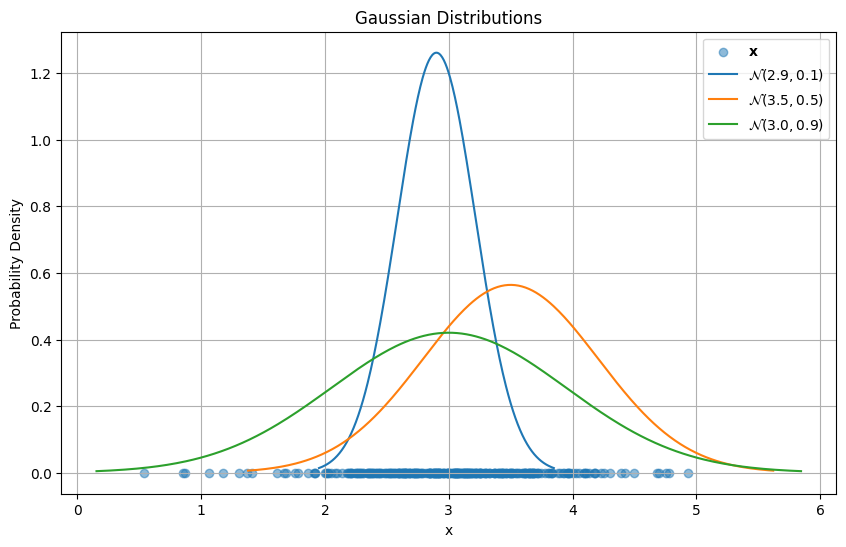

In [4]:
import jax.numpy as jnp
import jax.random as random
from jax.scipy.stats import norm
import matplotlib.pyplot as plt

# Set random seed
key = random.PRNGKey(0)

# Generate sample data
N = 300
mu_true, sigma_true = 3, 0.5  # True mean and standard deviation
s = random.normal(key, shape=(N,)) * jnp.sqrt(sigma_true) + mu_true
y = jnp.zeros(N)

def sim_gauss(mu: float, sig: float, n_s: int) -> tuple:
    """
    Simulate Gaussian distribution data.

    Parameters:
    mu (float): Mean of the Gaussian distribution.
    sig (float): Variance of the Gaussian distribution.
    n_s (int): Number of samples.

    Returns:
    tuple: Arrays of x values and corresponding Gaussian probability density function values.
    """
    sigma = jnp.sqrt(sig)
    x = jnp.linspace(mu - 3*sigma, mu + 3*sigma, n_s)
    y = norm.pdf(x, mu, sigma)
    return x, y

# Simulate possible Gaussian distributions
gx1, gy1 = sim_gauss(2.9, 0.1, N)
gx2, gy2 = sim_gauss(3.5, 0.5, N)
gx3, gy3 = sim_gauss(3.0, 0.9, N)

# Plotting using matplotlib
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(s, y, label=r'$\mathbf{x}$', alpha=0.5)
plt.plot(gx1, gy1, label=r'$\mathcal{N}(2.9, 0.1)$')
plt.plot(gx2, gy2, label=r'$\mathcal{N}(3.5, 0.5)$')
plt.plot(gx3, gy3, label=r'$\mathcal{N}(3.0, 0.9)$')

plt.title("Gaussian Distributions")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()


## Likelihood function for the Gaussian
We have seen that the joint probability of two independent events is given by the product of the marginal probabilities for each event separately. Because our data set $\mathbf x$ is i.i.d.
  
$$
\mathcal{p}(\mathbf x|\mu,\sigma^2)=\prod_{n=1}^N\mathscr N(x_n|\mu,\sigma^2)
$$

## $\log$ of the Gaussian likelihood function
In practice, it is more convenient to maximize the log of the likelihood function.
$$
\mathcal{p}(\mathbf x|\mu,\sigma^2)=\log\left(\prod_{n=1}^N\mathscr N(x_n|\mu,\sigma^2)\right)
$$

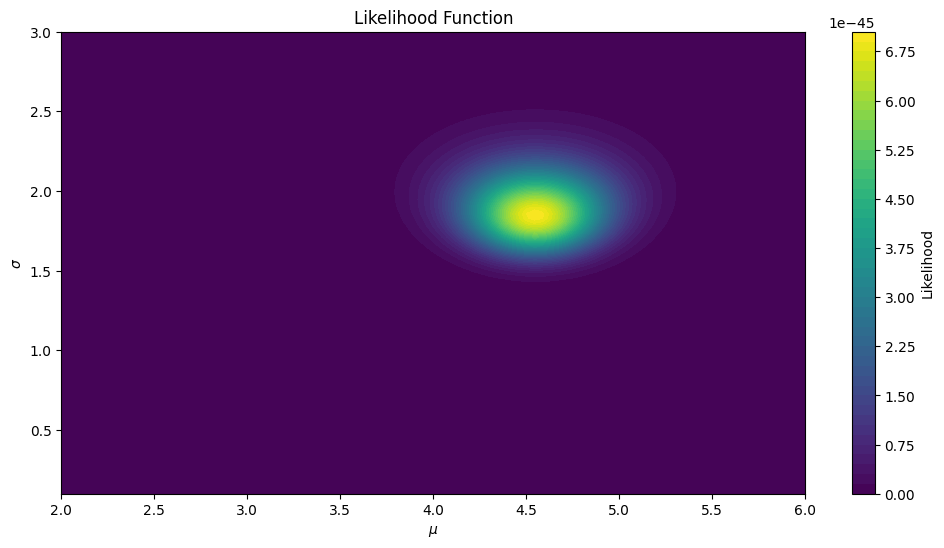

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=50)

# Likelihood function
def likelihood(mu, sigma, data):
    n = len(data)
    return (1 / (np.sqrt(2 * np.pi) * sigma))**n * np.exp(-1 / (2 * sigma**2) * np.sum((data - mu)**2))

# Generate values for mu and sigma
mu_values = np.linspace(2, 6, 100)
sigma_values = np.linspace(0.1, 3, 100)
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)
likelihood_values = np.array([[likelihood(mu, sigma, data) for mu in mu_values] for sigma in sigma_values])

# Plotting the likelihood function
plt.figure(figsize=(12, 6))
plt.contourf(mu_grid, sigma_grid, likelihood_values, levels=50, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Likelihood Function')
plt.show()



### Estimators for Mean ($\mu$) and Variance ($\sigma^2$)

**$\mu$ Estimator**:
The MLE for the mean ($\mu$) of a normal distribution is the sample mean. This estimator is given by:
$$
\mu_{ML} = \frac{1}{N}\sum_{i=1}^N x_i
$$
where $N$ is the number of observations, and $x_i$ are the observed data points.

**$\sigma^2$ Estimator**:
The MLE for the variance ($\sigma^2$) of a normal distribution is the sample variance, calculated as:
$$
\sigma^2_{ML} = \frac{1}{N}\sum_{i=1}^N (x_i - \mu_{ML})^2
$$
where $\mu_{ML}$ is the MLE of the mean.

#### Expectations of the MLEs

The estimators obtained via MLE have certain expected properties, which can be derived as follows:

**Expectation of $\mu_{ML}$**:
The expected value of the MLE for the mean is equal to the true mean ($\mu$) of the population:
$$
E[\mu_{ML}] = \mu
$$

**Expectation of $\sigma^2_{ML}$**:
The expected value of the MLE for the variance is slightly biased. It is given by:
$$
E[\sigma^2_{ML}] = \left(\frac{N-1}{N}\right)\sigma^2
$$
This shows that $\sigma^2_{ML}$ tends to underestimate the true variance by a factor of $\frac{N-1}{N}$.

To obtain an unbiased estimator for the variance, we often use:
$$
\sigma^2 = \frac{1}{N-1}\sum_{i=1}^N (x_i - \mu)^2
$$

### Summary
In summary, MLE provides a method to estimate the parameters $\mu$ and $\sigma^2$ of a normal distribution from observed data. While the MLE for the mean is unbiased, the MLE for the variance is slightly biased and requires adjustment to become an unbiased estimator.